In [83]:
import matplotlib.pyplot as plt
import numpy as np
import coco_cooc
import imp
imp.reload(coco_cooc)

from coco_cooc import cooc_from_json, show_cooc_mat

In [84]:
coco_train_anno_path = '../mscoco/annotations/instances_train2017.json'
coco_val_anno_path = '../mscoco/annotations/instances_val2017.json'

# Count Co-occurance

In [14]:
cooc_mat, _, categories = cooc_from_json(coco_train_anno_path)
# cooc_mat 80*80
# categories[0]:id, categories[1]:name, categories[2]:count

In [86]:
# remove some categories: 
#   - 1 "person" (#0): it is much larger than all other categories
#   - 13 transportation categories (#1-#13)
#   - 10 animals (#14-#23)
# cooc_mat = np.array(cooc_mat)[39:, 39:]
# categories = categories[39:]
# cooc_mat = np.array(cooc_mat)[1:-1, 1:-1]
# categories = categories[1:-1]

In [87]:
print(len(categories))

80


# Raw counts of each category

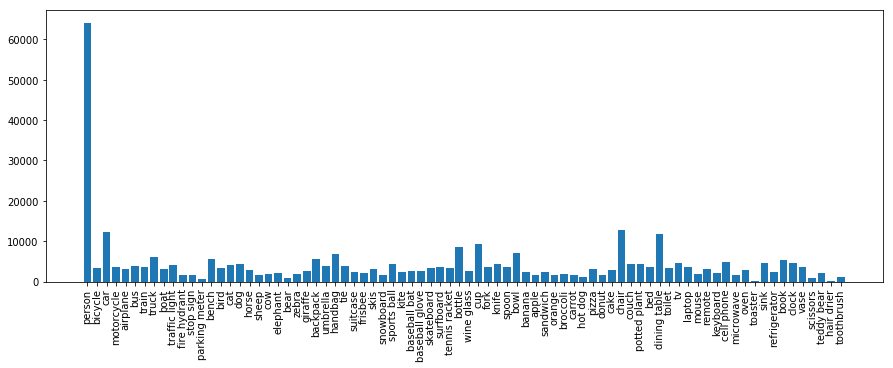

In [88]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(range(len(categories)), [c[2] for c in categories])
plt.xticks(range(len(categories)), [cat[1] for cat in categories], rotation=90, fontsize="medium")
plt.show()

In [89]:
print('id |       name       | count')
print('-'*32)
for c in categories: 
    print('{c[0]} | {c[1]:16} | {c[2]}'.format(c=c))

id |       name       | count
--------------------------------
1 | person           | 64115
2 | bicycle          | 3252
3 | car              | 12251
4 | motorcycle       | 3502
5 | airplane         | 2986
6 | bus              | 3952
7 | train            | 3588
8 | truck            | 6127
9 | boat             | 3025
10 | traffic light    | 4139
11 | fire hydrant     | 1711
13 | stop sign        | 1734
14 | parking meter    | 705
15 | bench            | 5570
16 | bird             | 3237
17 | cat              | 4114
18 | dog              | 4385
19 | horse            | 2941
20 | sheep            | 1529
21 | cow              | 1968
22 | elephant         | 2143
23 | bear             | 960
24 | zebra            | 1916
25 | giraffe          | 2546
27 | backpack         | 5528
28 | umbrella         | 3968
31 | handbag          | 6841
32 | tie              | 3810
33 | suitcase         | 2402
34 | frisbee          | 2184
35 | skis             | 3082
36 | snowboard        | 1654
37 | sports ball  

# Plot square root co-occurence matrix

In [90]:
# print(cooc_mat)

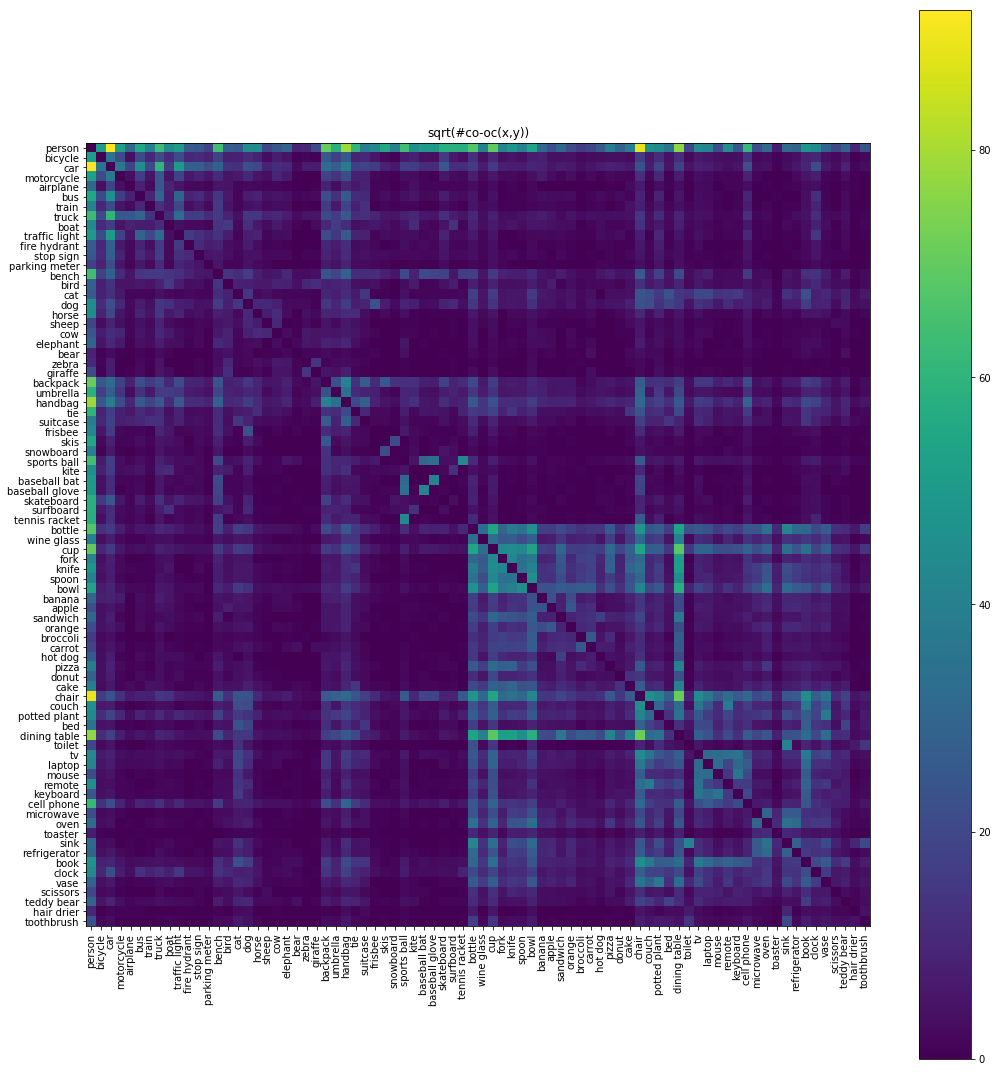

In [91]:
%matplotlib inline
plt.figure(figsize=(15,15))
show_cooc_mat(np.sqrt(cooc_mat), categories, title='sqrt(#co-oc(x,y))')

# Conditional probability: P(X|Y)

For example, if one picture has label fork, then the label knife, spoon and wine_glasses are likely to show up too.

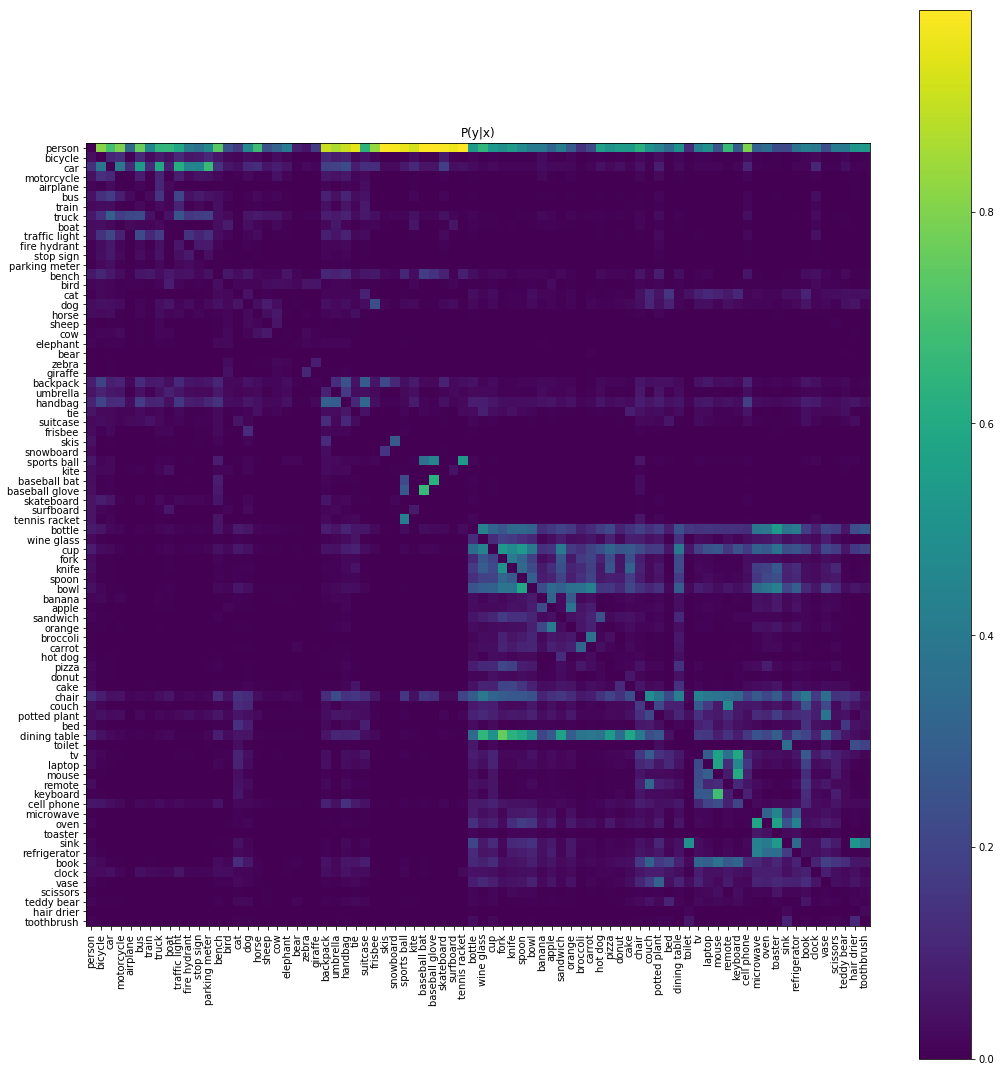

In [92]:
%matplotlib inline
plt.figure(figsize=(15,15))
# p(x|y) = p(x, y)/p(y) = cooc(x,y)/oc(y)
# divide line by line
cond = cooc_mat / np.reshape([c[2] for c in categories], (1, -1))
# print(np.reshape([c[2] for c in categories], (1, -1)).shape)
# print(cooc_mat[1])
# print(np.reshape([c[2] for c in categories], (1, -1))[0],cond[1])
show_cooc_mat(cond, categories, title='P(y|x)')

# Create Conditional Training Probability and Marginal Probability for Box

In [10]:
import json
import tensorflow as tf
from collections import defaultdict

In [11]:
TRAIN_LABELS_FILE = '../mscoco/annotations/instances_train2014.json'
VAL_LABELS_FILE = '../mscoco/annotations/instances_train2014.json'

In [12]:
# read category
def read_from_json(json_path):
    img_id2cat_id = defaultdict(list)
    
    json_data = json.load(open(json_path))
    image_ids = [im['id'] for im in json_data['images']]    
    catid2name = {category['id']: category['name'] for category in json_data['categories']}
    idx2catid = [catid for catid in catid2name]
    catid2idx = {catid: idx for idx, catid in enumerate(idx2catid)}
    
    for anno in json_data['annotations']:
        if anno['category_id'] not in img_id2cat_id[anno['image_id']]:
            img_id2cat_id[int(anno['image_id'])].append(anno['category_id'])
    # print('number of images with annotations', len(img_id2cat_id))
    return img_id2cat_id, catid2name, catid2idx, idx2catid


In [13]:
train_img_id2cat_id, catid2name, catid2idx, idx2catid = read_from_json(TRAIN_LABELS_FILE)

In [15]:
cooc_mat, _, categories = cooc_from_json(TRAIN_LABELS_FILE)

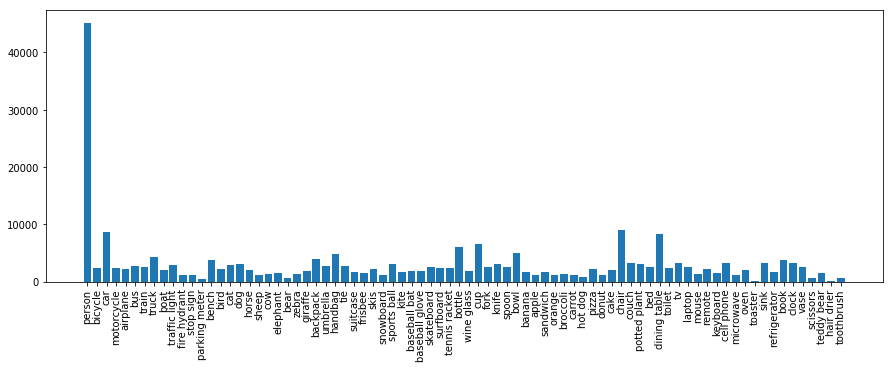

In [16]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(range(len(categories)), [c[2] for c in categories])
plt.xticks(range(len(categories)), [cat[1] for cat in categories], rotation=90, fontsize="medium")
plt.show()

In [17]:
print('id |       name       | count')
print('-'*32)
for c in categories: 
    print('{c[0]} | {c[1]:16} | {c[2]}'.format(c=c))

id |       name       | count
--------------------------------
1 | person           | 45174
2 | bicycle          | 2287
3 | car              | 8606
4 | motorcycle       | 2442
5 | airplane         | 2243
6 | bus              | 2791
7 | train            | 2464
8 | truck            | 4321
9 | boat             | 2098
10 | traffic light    | 2893
11 | fire hydrant     | 1205
13 | stop sign        | 1214
14 | parking meter    | 481
15 | bench            | 3844
16 | bird             | 2241
17 | cat              | 2818
18 | dog              | 3041
19 | horse            | 2068
20 | sheep            | 1105
21 | cow              | 1389
22 | elephant         | 1518
23 | bear             | 668
24 | zebra            | 1324
25 | giraffe          | 1798
27 | backpack         | 3924
28 | umbrella         | 2749
31 | handbag          | 4861
32 | tie              | 2667
33 | suitcase         | 1631
34 | frisbee          | 1511
35 | skis             | 2209
36 | snowboard        | 1170
37 | sports ball   

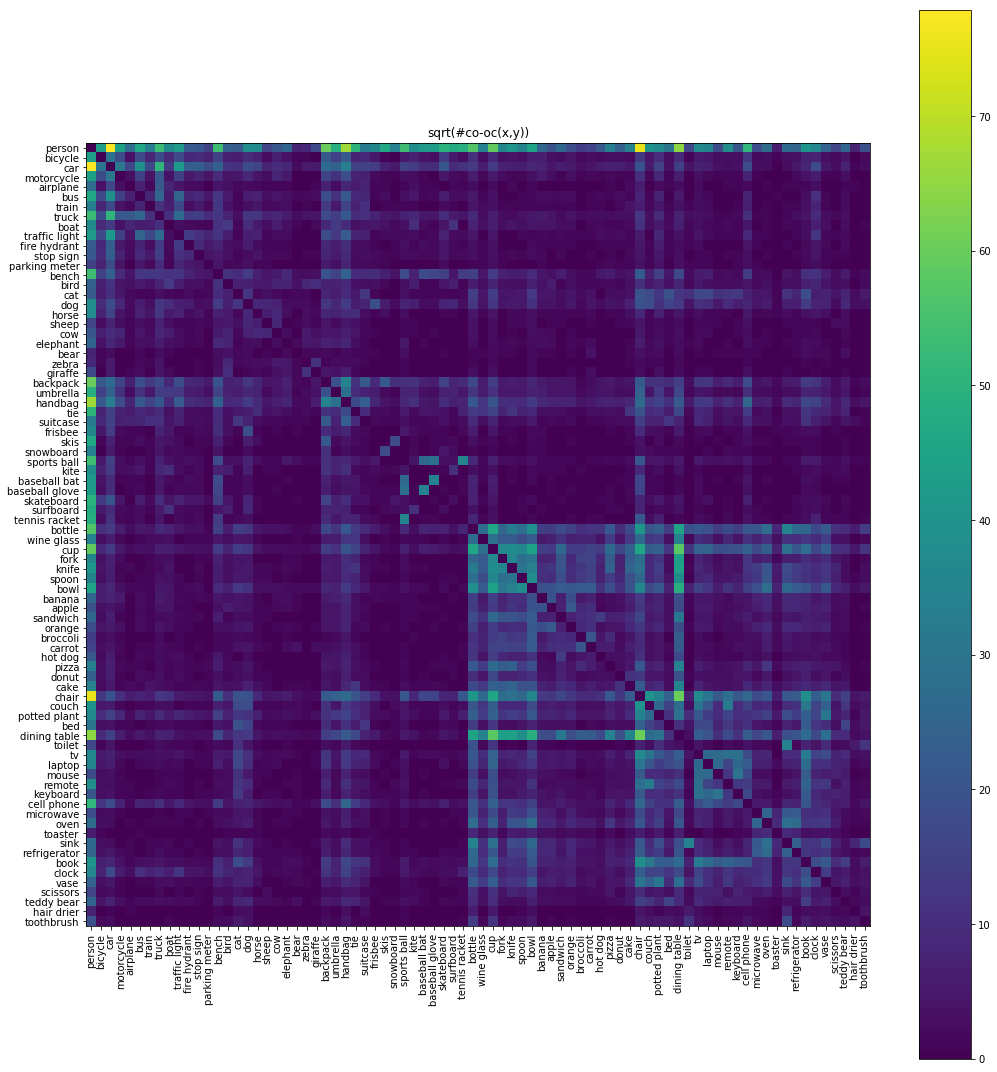

In [18]:
%matplotlib inline
plt.figure(figsize=(15,15))
show_cooc_mat(np.sqrt(cooc_mat), categories, title='sqrt(#co-oc(x,y))')

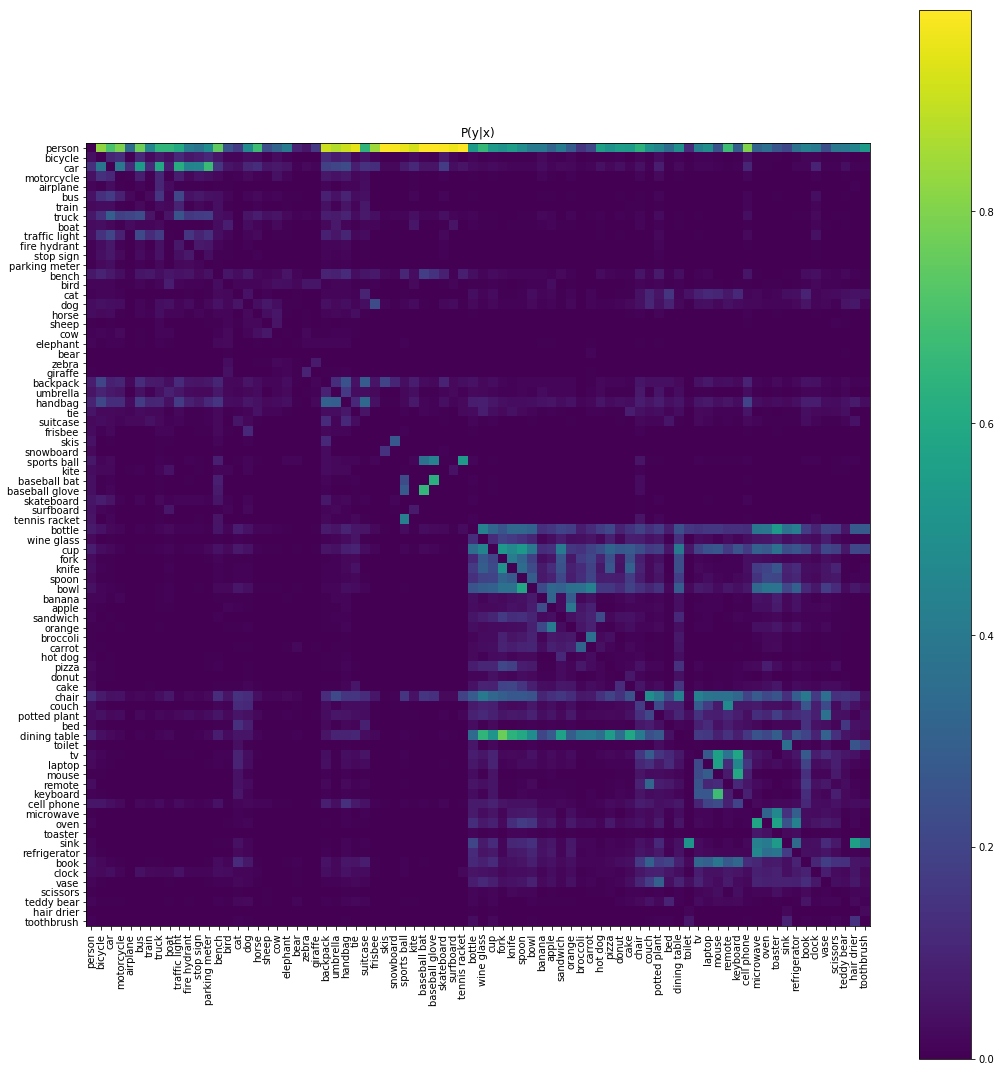

In [19]:
%matplotlib inline
plt.figure(figsize=(15,15))
# p(x|y) = p(x, y)/p(y) = cooc(x,y)/oc(y)
# divide line by line
cond = cooc_mat / np.reshape([c[2] for c in categories], (1, -1))
# print(np.reshape([c[2] for c in categories], (1, -1)).shape)
# print(cooc_mat[1])
# print(np.reshape([c[2] for c in categories], (1, -1))[0],cond[1])
show_cooc_mat(cond, categories, title='P(y|x)')

In [26]:
# cond(i, j) = cooc/oc(j) = p(i|j)
# IsA j, i prob
# dog animal = 1, p(animal | dog) = 1
print(cond.shape)
for i in range(80):
    for j in range(80):
        if cond[i, j] > 0.5:
            print(catid2name[idx2catid[i]],catid2name[idx2catid[j]], cond[i, j], cond[j, i], marg_list[i], marg_list[j])

(80, 80)
person person 1.0 1.0 0.5503587919250497 0.5503587919250497
person bicycle 0.8264101442938347 0.04183822552795856 0.5503587919250497 0.027862720970748406
person car 0.7043922844527074 0.13419223447115597 0.5503587919250497 0.10484765049158758
person motorcycle 0.7964782964782965 0.04305574002744942 0.5503587919250497 0.029751099523641283
person bus 0.7699749193837334 0.04757161198919733 0.5503587919250497 0.03400299703950975
person truck 0.6528581346910437 0.06244742551024926 0.5503587919250497 0.052643120819678126
person boat 0.6530028598665396 0.030327179350954088 0.5503587919250497 0.025560117444962904
person traffic light 0.6062910473556862 0.03882764422012662 0.5503587919250497 0.03524567195818765
person bench 0.7468782518210197 0.06355425687342277 0.5503587919250497 0.04683178811174328
person horse 0.683752417794971 0.03130119095054677 0.5503587919250497 0.025194624821822345
person backpack 0.9153924566768603 0.07951476513038473 0.5503587919250497 0.04780643510678476
per

In [149]:
def recorder_write_edges_to_examples(edges, filename, batch_size):
    """Writes a list of tuples of ids to a RecordIO file of tf.Examples."""
    writer = tf.python_io.TFRecordWriter(filename)
    counter = 0
    while counter * batch_size < len(edges):
        start_idx = counter * batch_size
        end_idx = (counter + 1) * batch_size
        if end_idx > len(edges):
            end_idx = len(edges)
        feature_u = [u for u, _, _ in edges[start_idx:end_idx]]
        feature_v = [v for _, v, _ in edges[start_idx:end_idx]]
        feature_prob = [prob for _, _, prob in edges[start_idx: end_idx]]
        example = tf.train.Example(features=tf.train.Features(
            feature={
                'u': tf.train.Feature(int64_list=tf.train.Int64List(value=feature_u)),
                'v': tf.train.Feature(int64_list=tf.train.Int64List(value=feature_v)),
                'prob': tf.train.Feature(float_list=tf.train.FloatList(value=feature_prob))}))
        writer.write(example.SerializeToString())
        counter += 1
    writer.close()

In [150]:
def recorder_write_marginal_edges_to_examples(marg_list, filename, batch_size):
    """Writes a list of tuples of ids to a RecordIO file of tf.Examples."""
    writer = tf.python_io.TFRecordWriter(filename)
    counter = 0
    while counter * batch_size < len(marg_list):
        start_idx = counter * batch_size
        end_idx = (counter + 1) * batch_size
        if end_idx > len(marg_list):
            end_idx = len(marg_list)
        feature_idx = [i for i in range(len(marg_list))]
        feature_prob = [prob for prob in marg_list[start_idx: end_idx]]
        example = tf.train.Example(features=tf.train.Features(
            feature={
                'marg_idx' : tf.train.Feature(int64_list=tf.train.Int64List(value=feature_idx)),
                'marg_prob': tf.train.Feature(float_list=tf.train.FloatList(value=feature_prob))}))
        writer.write(example.SerializeToString())
        counter += 1
    writer.close()

In [139]:
def recorder_write_all_edges_to_examples(edges, marg_edges, filename, batch_size):
    """Writes a list of tuples of ids to a RecordIO file of tf.Examples."""
    writer = tf.python_io.TFRecordWriter(filename)
    feature_u = [u for u, _, _ in edges[:]]
    feature_v = [v for _, v, _ in edges[:]]
    feature_prob = [prob for _, _, prob in edges[:]]
    marg_prob = [marg_prob for marg_prob in marg_edges[:]]
    for i in range(len(marg_prob), len(feature_prob)):
        marg_prob.append(0)
    print(len(feature_u), len(feature_v), len(feature_prob), len(marg_prob))
    example = tf.train.Example(features=tf.train.Features(
            feature={
                'u': tf.train.Feature(int64_list=tf.train.Int64List(value=feature_u)),
                'v': tf.train.Feature(int64_list=tf.train.Int64List(value=feature_v)),
                'prob': tf.train.Feature(float_list=tf.train.FloatList(value=feature_prob)),
                'marg_prob': tf.train.Feature(float_list=tf.train.FloatList(value=feature_prob))}))
    writer.write(example.SerializeToString())
    writer.close()

In [140]:
recorder_write_all_edges_to_examples(cond_list, marg_list, 'all.tfrecord', 5418)

5418 5418 5418 5418


In [23]:
cond_list = []
for i in range(len(cond)):
    for j in range(len(cond)):
        if cond[i, j]>0.0:
            cond_list.append((i, j, cond[i, j]))
print(len(cond_list))

5228


In [24]:
marg_list = []
count = np.reshape([c[2] for c in categories], (-1))
total = len(train_img_id2cat_id)
with open('marg_prob.txt', 'w') as outputfile:
    for i in range(len(count)):
        marg_list.append(count[i]/total)
print(len(marg_list))

80


In [148]:
# 5338 is the length of the no-zero conditional probabilities
recorder_write_edges_to_examples(cond_list, 'cond.tfrecord', 5418)
recorder_write_marginal_edges_to_examples(marg_list, 'marg.tfrecord', 80)

In [134]:
with open('cond_prob_no_zero.txt', 'w') as outputfile:
    for i in range(len(cond)):
        for j in range(len(cond)):
            if cond[i, j]>0.0:
                outputfile.write(str(j)+'\t'+str(i)+'\t'+str(cond[i, j])+'\n')

In [131]:
count = np.reshape([c[2] for c in categories], (-1))
total = len(train_img_id2cat_id)
with open('marg_prob.txt', 'w') as outputfile:
    for i in range(len(count)):
        outputfile.write(str(count[i]/total)+'\n')
#         print(catid2name[idx2catid[i]], count[i], count[i]/total)

In [27]:
def f1_score(prec, recall):
    return(2*prec*recall / (prec + recall))

In [37]:
f1_score(0.6967, 0.1757)

0.2806285878037597

# PMI

In [57]:
def mutual_info(category_info, co_occur_matrix, normalize=False):
    total = np.sum([c[2] for c in category_info])
    p_c = np.array([c[2] for c in category_info]) / total

    p_y1_x1 = co_occur_matrix / total
    p_y0_x1 = p_c - p_y1_x1
    p_y1_x0 = p_c.reshape(-1, 1) - p_y1_x1
    p_y0_x0 = 1 - p_y1_x1 - p_y0_x1 - p_y1_x0

    log_p_y0_x1 = p_y0_x1.copy()
    log_p_y0_x1[np.where(p_y0_x1==0)] = 0.01
    log_p_y0_x1 = np.log(log_p_y0_x1)

    log_p_y1_x0 = p_y1_x0.copy()
    log_p_y1_x0[np.where(p_y1_x0==0)] = 0.01
    log_p_y1_x0 = np.log(log_p_y1_x0)

    log_p_y0_x0 = p_y0_x0.copy()
    log_p_y0_x0[np.where(p_y0_x0==0)] = 0.01
    log_p_y0_x0 = np.log(log_p_y0_x0)

    log_p_y1_x1 = p_y1_x1.copy()
    log_p_y1_x1[np.where(p_y1_x1==0)] = 0.01
    log_p_y1_x1 = np.log(log_p_y1_x1)

    MI = p_y0_x0 * (log_p_y0_x0 - np.log(1.0 - p_c) - np.log(1.0 - p_c.reshape(-1, 1))) \
       + p_y1_x0 * (log_p_y1_x0 - np.log(1.0 - p_c) - np.log(p_c.reshape(-1, 1))) \
       + p_y0_x1 * (log_p_y0_x1 - np.log(p_c) - np.log(1.0 - p_c.reshape(-1, 1))) \
       + p_y1_x1 * (log_p_y1_x1 - np.log(p_c) - np.log(p_c.reshape(-1, 1)))
    
    if normalize:
        ent = - p_c * np.log(p_c) - (1.0 - p_c) * np.log(1.0 - p_c)
        norm = np.minimum(ent.reshape(-1, 1), ent.reshape(1, -1))
        MI = MI / norm
        
    return MI

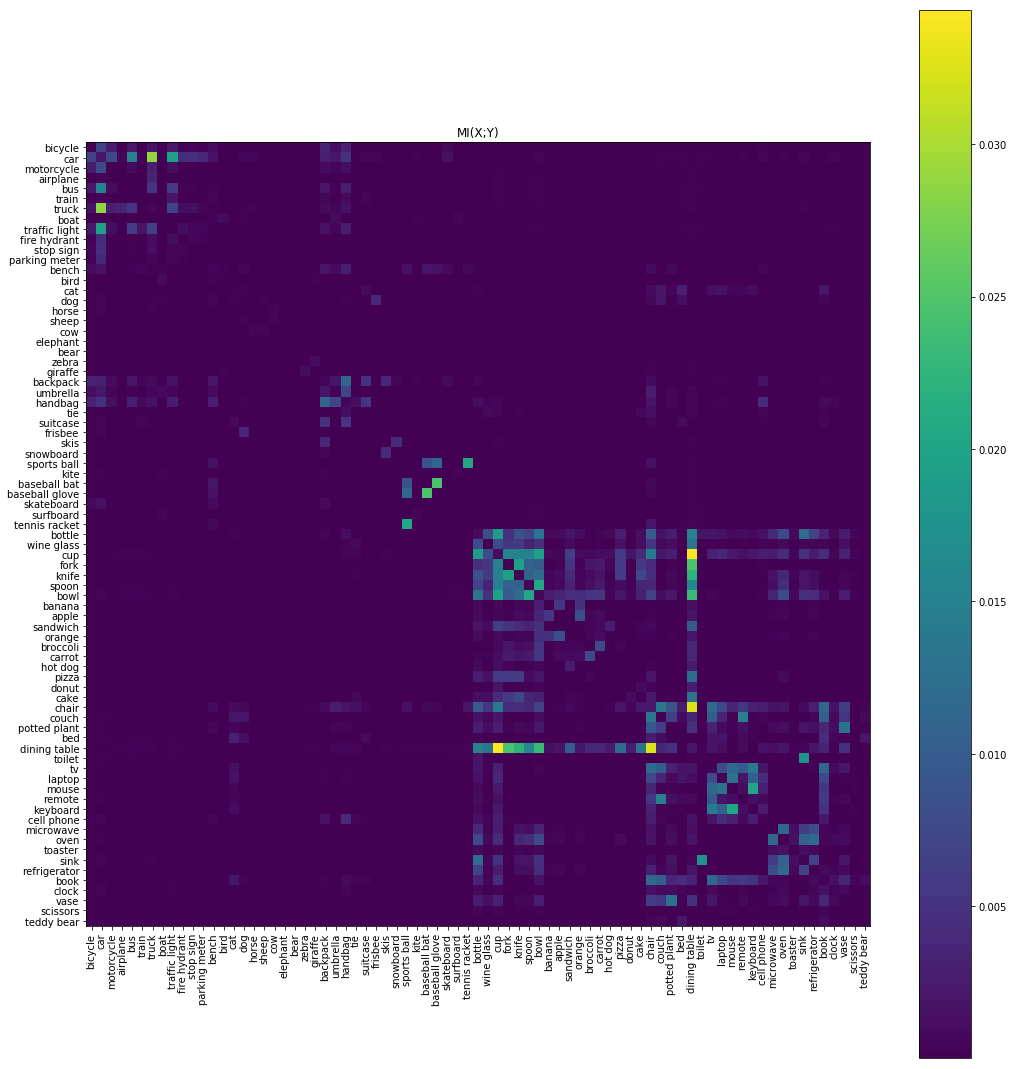

         top pairs          |   MI
----------------------------------------
(dining table,cup         ) | 0.034411
(dining table,chair       ) | 0.032509
(car         ,truck       ) | 0.028714
(baseball glove,baseball bat) | 0.024688
(dining table,fork        ) | 0.024683
(dining table,bowl        ) | 0.023161
(knife       ,dining table) | 0.022226
(sports ball ,tennis racket) | 0.020656
(bowl        ,spoon       ) | 0.020466
(mouse       ,keyboard    ) | 0.020189
(car         ,traffic light) | 0.019710
(knife       ,fork        ) | 0.019527
(bowl        ,cup         ) | 0.019430
(cup         ,bottle      ) | 0.019047
(sink        ,toilet      ) | 0.017582
(spoon       ,dining table) | 0.016036
(cup         ,fork        ) | 0.015149
(spoon       ,cup         ) | 0.015056
(cup         ,knife       ) | 0.015014
(bus         ,car         ) | 0.014982
(dining table,bottle      ) | 0.014982
(remote      ,couch       ) | 0.014927
(keyboard    ,tv          ) | 0.014088
(chair       ,cup      

In [60]:
%matplotlib inline
plt.figure(figsize=(15,15))

MI = mutual_info(categories, cooc_mat, normalize=False)

show_cooc_mat(MI, categories, title='MI(X;Y)')

# list first top_k pairs
top_k = 25
print('         top pairs          |   MI')
print('-'*40)
for idx in np.argsort(MI.reshape(-1)*-1)[:top_k*2:2]:
    c_x, c_y = idx % 77, idx // 77
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], MI[c_y, c_x]))
    
# list first top_k pairs with fork
top_k = 25
c_x = 3  # "fork"
print('\n   top pairs w/ {:12}|   MI'.format(categories[c_x][1]))
print('-'*40)
for c_y in np.argsort(MI[:,c_x] * -1)[:top_k]:
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], MI[c_y, c_x]))

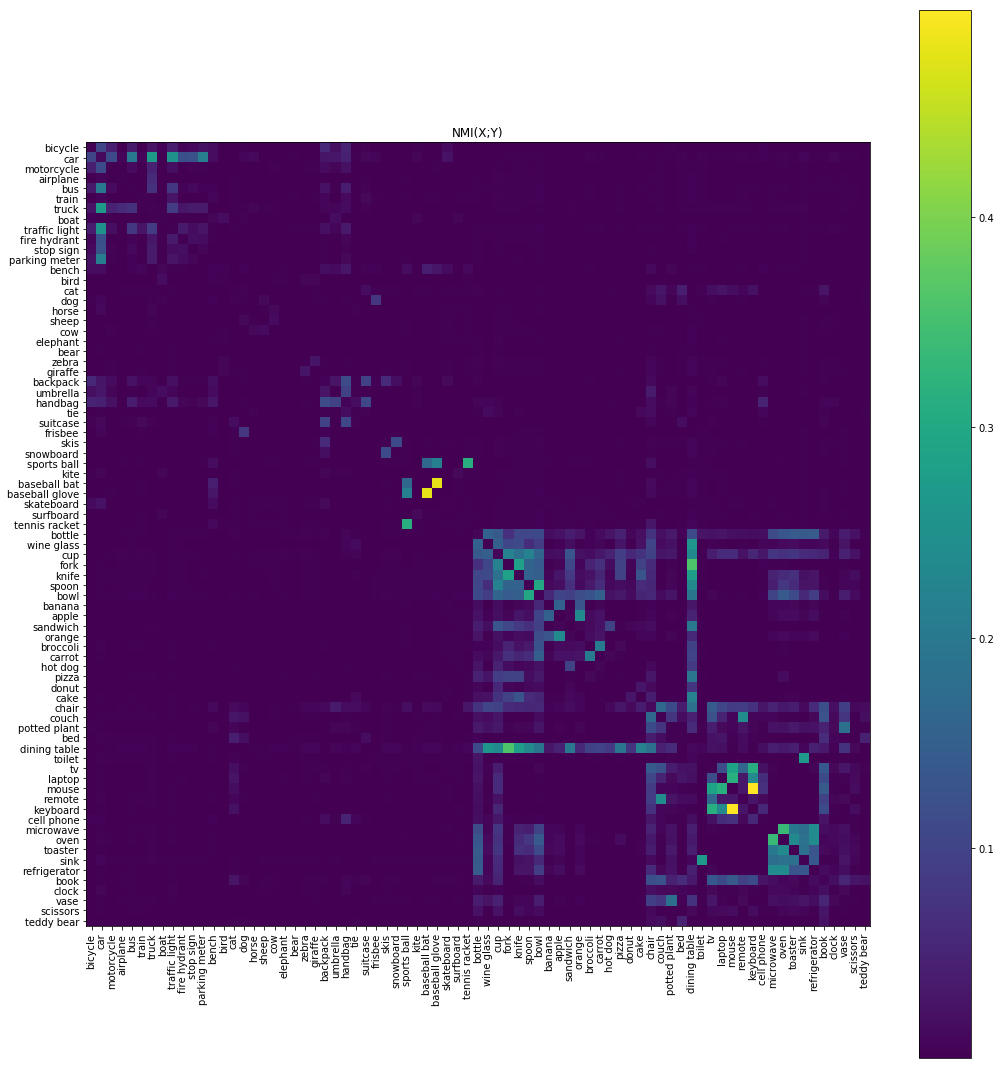

         top pairs          |   NMI
----------------------------------------
(keyboard    ,mouse       ) | 0.498553
(baseball glove,baseball bat) | 0.479660
(dining table,fork        ) | 0.360265
(oven        ,microwave   ) | 0.338338
(laptop      ,mouse       ) | 0.316859
(tv          ,keyboard    ) | 0.314916
(sports ball ,tennis racket) | 0.313058
(bowl        ,spoon       ) | 0.300496
(tv          ,mouse       ) | 0.288242
(knife       ,fork        ) | 0.285014
(knife       ,dining table) | 0.276811
(car         ,truck       ) | 0.270968
(sink        ,toilet      ) | 0.269115
(dining table,wine glass  ) | 0.257817
(car         ,traffic light) | 0.254363
(remote      ,couch       ) | 0.245131
(oven        ,refrigerator) | 0.240806
(refrigerator,microwave   ) | 0.240740
(orange      ,apple       ) | 0.239376
(oven        ,toaster     ) | 0.238536
(dining table,cup         ) | 0.236779
(spoon       ,dining table) | 0.235453
(keyboard    ,laptop      ) | 0.235081
(cup         ,fork    

In [61]:
%matplotlib inline
plt.figure(figsize=(15,15))

NMI = mutual_info(categories, cooc_mat, normalize=True)

show_cooc_mat(NMI, categories, title='NMI(X;Y)')

# list first top_k pairs
top_k = 25
print('         top pairs          |   NMI')
print('-'*40)
for idx in np.argsort(NMI.reshape(-1)*-1)[:top_k*2:2]:
    c_x, c_y = idx % 77, idx // 77
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], NMI[c_y, c_x]))
       
# list first top_k pairs with fork
top_k = 25
c_x = 3  # "fork"
print('\n   top pairs w/ {:12}|   NMI'.format(categories[c_x][1]))
print('-'*40)
for c_y in np.argsort(NMI[:,c_x] * -1)[:top_k]:
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], NMI[c_y, c_x]))

# COCO-Stuff dataset
The images in the COCO-Stuff dataset have been annotated for semantic segmentation for an additional 91 classes (called 'stuff') that do not overlap with the 80 classes (called 'things') found in the original COCO dataset.

The classes in the Stuff include textures both natural (sand, sky, trees etc.) and manmade (bricks, concrete, stone, tiles, walls with tile, wood etc), different weather conditions (fog, clouds, water-drops etc.), structures (buildings, bridges, railroads etc.).

In [30]:
coco_train_anno_path = '../mscoco/stuff_annotations/stuff_train2017.json'
coco_val_anno_path = '../mscoco/stuff_annotations/stuff_val2017.json'

In [37]:
cooc_mat = np.array(cooc_mat)[:91, :91]
categories = categories[:91]

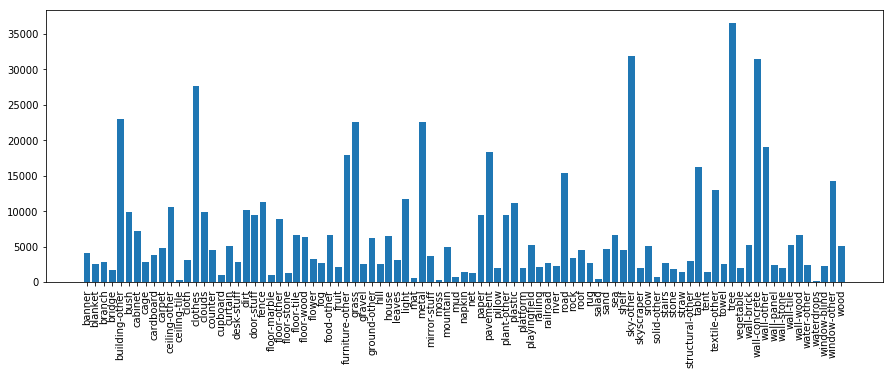

In [38]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(range(len(categories)), [c[2] for c in categories])
plt.xticks(range(len(categories)), [cat[1] for cat in categories], rotation=90, fontsize="medium")
plt.show()

In [39]:
print('id |       name       | count')
print('-'*32)
for c in categories: 
    print('{c[0]} | {c[1]:16} | {c[2]}'.format(c=c))

id |       name       | count
--------------------------------
92 | banner           | 4135
93 | blanket          | 2598
94 | branch           | 2813
95 | bridge           | 1676
96 | building-other   | 23021
97 | bush             | 9849
98 | cabinet          | 7176
99 | cage             | 2911
100 | cardboard        | 3787
101 | carpet           | 4858
102 | ceiling-other    | 10546
103 | ceiling-tile     | 351
104 | cloth            | 3129
105 | clothes          | 27657
106 | clouds           | 9886
107 | counter          | 4589
108 | cupboard         | 1004
109 | curtain          | 5101
110 | desk-stuff       | 2909
111 | dirt             | 10163
112 | door-stuff       | 9475
113 | fence            | 11303
114 | floor-marble     | 1002
115 | floor-other      | 8893
116 | floor-stone      | 1259
117 | floor-tile       | 6618
118 | floor-wood       | 6324
119 | flower           | 3259
120 | fog              | 2659
121 | food-other       | 6672
122 | fruit            | 2112
123 | furni

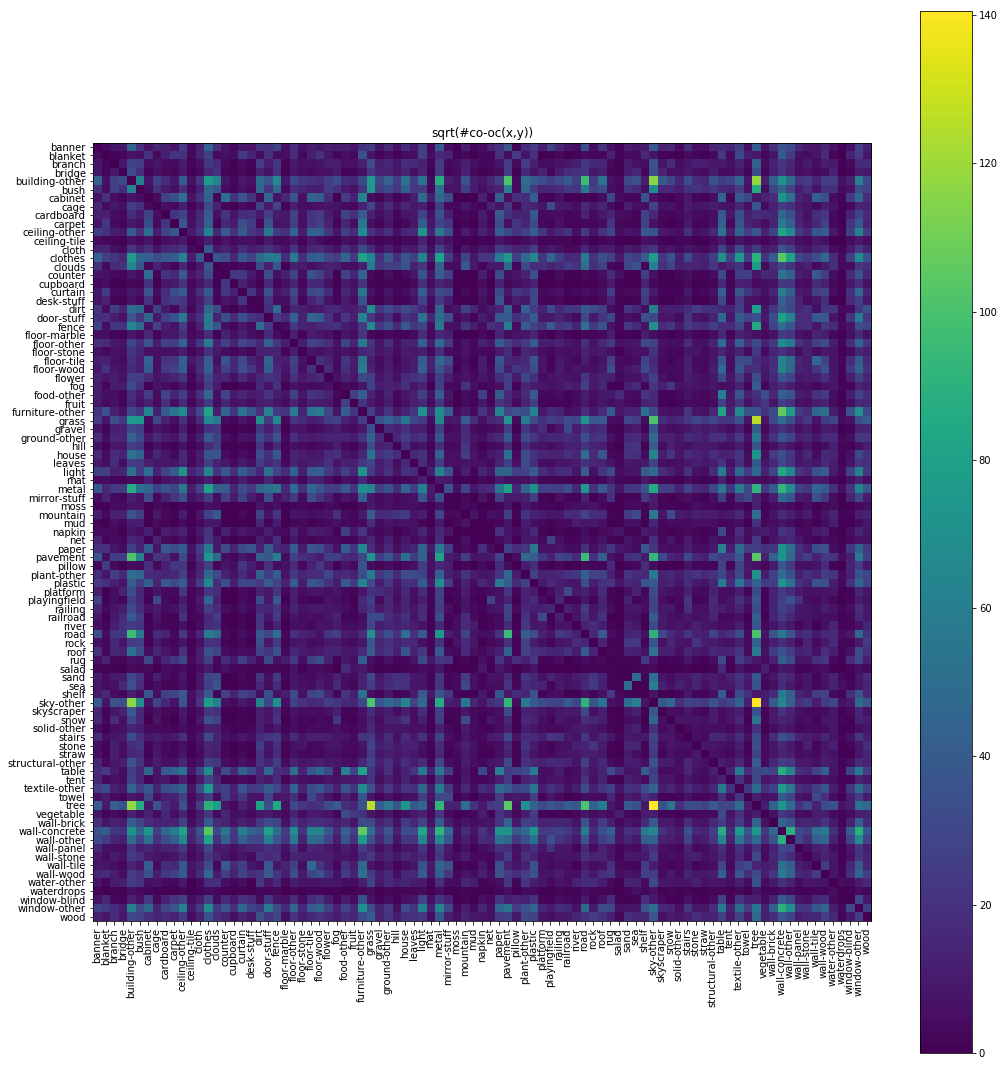

In [40]:
%matplotlib inline
plt.figure(figsize=(15,15))
show_cooc_mat(np.sqrt(cooc_mat), categories, title='sqrt(#co-oc(x,y))')

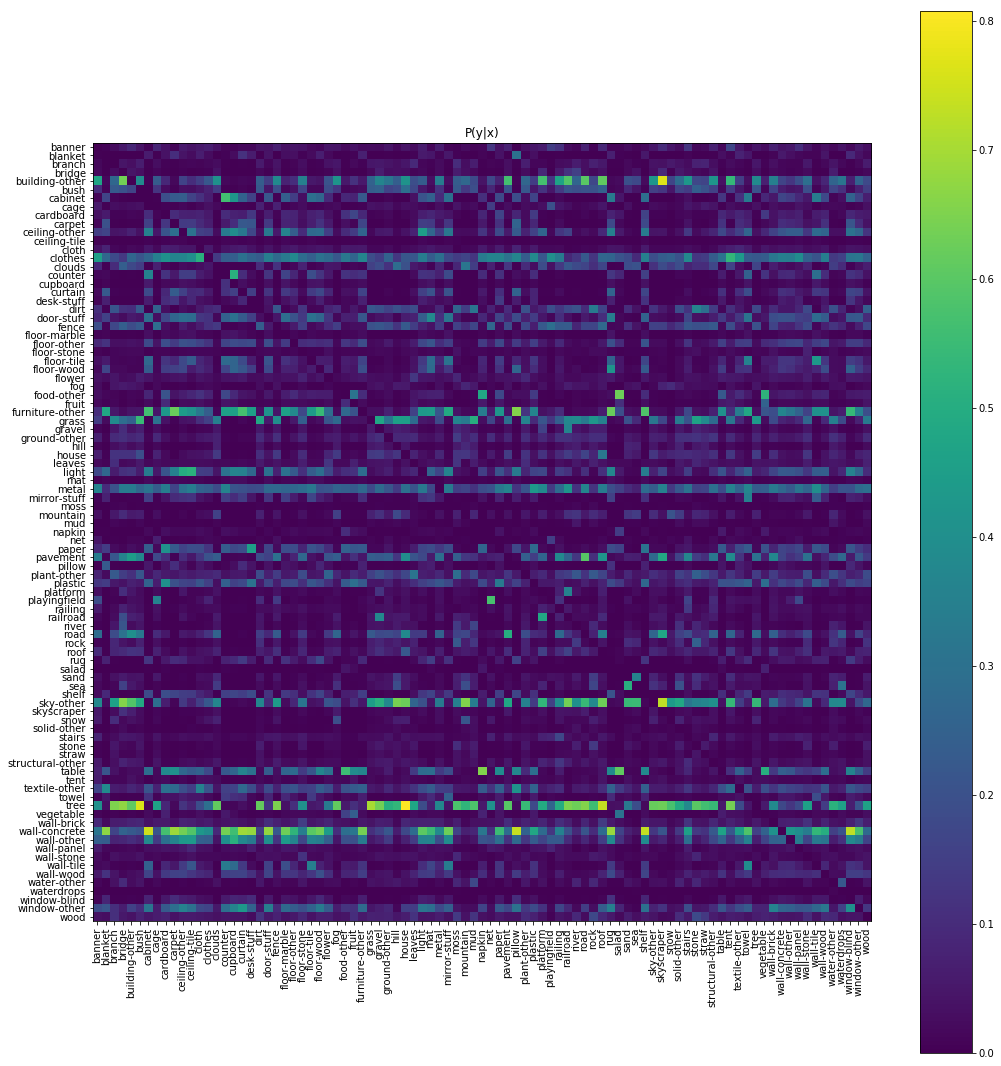

In [41]:
%matplotlib inline
plt.figure(figsize=(15,15))
# p(x|y) = p(x, y)/p(y) = cooc(x,y)/oc(y)
# divide line by line
cond = cooc_mat / np.reshape([c[2] for c in categories], (1, -1))
show_cooc_mat(cond, categories, title='P(y|x)')

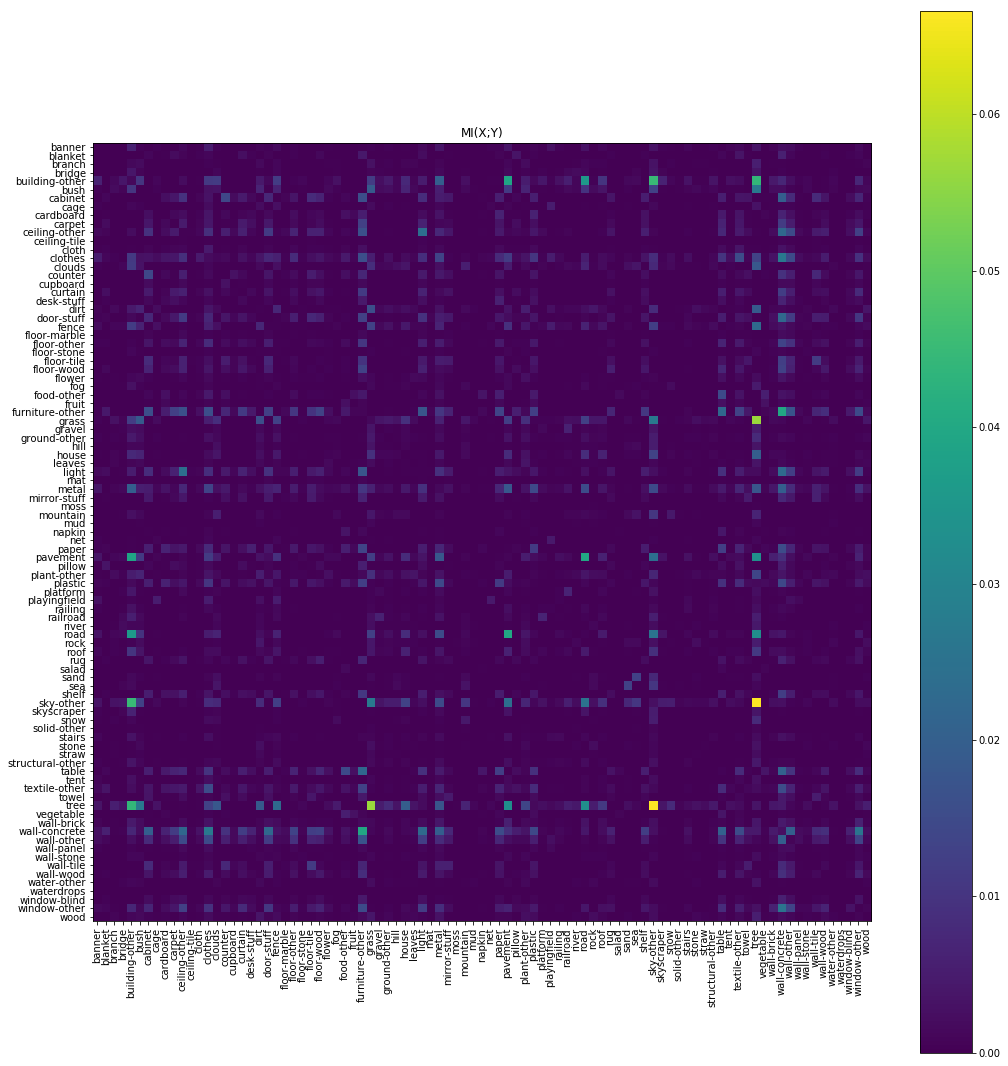

         top pairs          |   MI
----------------------------------------
(sky-other   ,tree        ) | 0.066624
(tree        ,grass       ) | 0.056635
(sky-other   ,building-other) | 0.045076
(building-other,tree        ) | 0.044058
(pavement    ,road        ) | 0.039883
(furniture-other,wall-concrete) | 0.039824
(building-other,pavement    ) | 0.039087
(road        ,building-other) | 0.035684
(tree        ,pavement    ) | 0.033298
(road        ,tree        ) | 0.032967
(wall-concrete,clothes     ) | 0.027043
(sky-other   ,grass       ) | 0.027038
(bush        ,tree        ) | 0.026819
(window-other,wall-concrete) | 0.025699
(road        ,sky-other   ) | 0.025277
(sky-other   ,pavement    ) | 0.024188
(light       ,ceiling-other) | 0.024121
(light       ,wall-concrete) | 0.022975
(tree        ,fence       ) | 0.022950
(door-stuff  ,wall-concrete) | 0.022402
(ceiling-other,wall-concrete) | 0.022287
(table       ,furniture-other) | 0.022285
(wall-concrete,table       ) | 0.020625
(wal

In [43]:
%matplotlib inline
plt.figure(figsize=(15,15))

MI = mutual_info(categories, cooc_mat, normalize=False)

show_cooc_mat(MI, categories, title='MI(X;Y)')

# list first top_k pairs
top_k = 25
print('         top pairs          |   MI')
print('-'*40)
for idx in np.argsort(MI.reshape(-1)*-1)[:top_k*2:2]:
    c_x, c_y = idx % 91, idx // 91
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], MI[c_y, c_x]))
    
# list first top_k pairs with fork
top_k = 25
c_x = 3  # "fork"
print('\n   top pairs w/ {:12}|   MI'.format(categories[c_x][1]))
print('-'*40)
for c_y in np.argsort(MI[:,c_x] * -1)[:top_k]:
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], MI[c_y, c_x]))

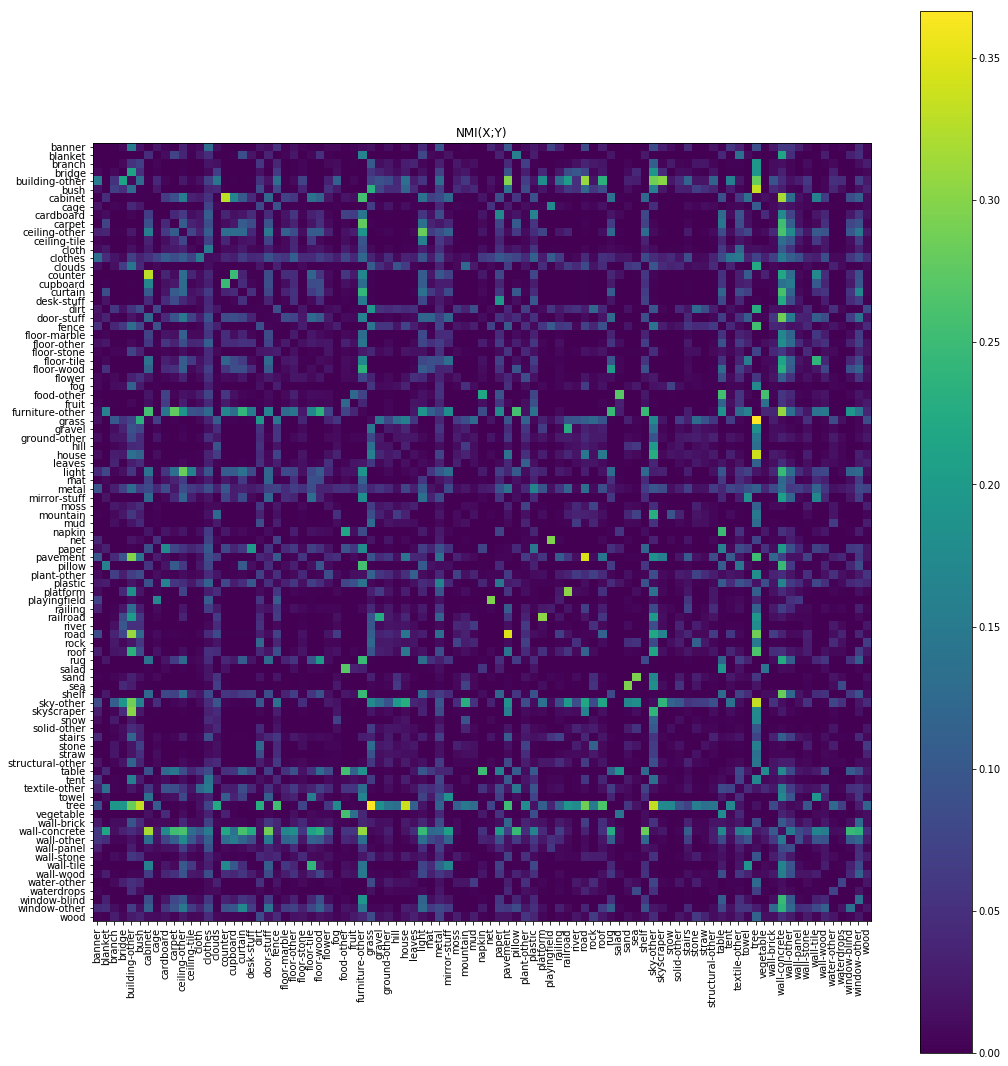

         top pairs          |   NMI
----------------------------------------
(tree        ,grass       ) | 0.366730
(pavement    ,road        ) | 0.347260
(tree        ,house       ) | 0.338602
(tree        ,sky-other   ) | 0.333274
(bush        ,tree        ) | 0.333160
(counter     ,cabinet     ) | 0.329629
(cabinet     ,wall-concrete) | 0.319119
(road        ,building-other) | 0.310703
(furniture-other,wall-concrete) | 0.308595
(platform    ,railroad    ) | 0.303114
(skyscraper  ,building-other) | 0.300990
(pavement    ,building-other) | 0.297362
(net         ,playingfield) | 0.296308
(sea         ,sand        ) | 0.293930
(building-other,sky-other   ) | 0.287556
(door-stuff  ,wall-concrete) | 0.287103
(road        ,tree        ) | 0.287043
(light       ,ceiling-other) | 0.283634
(wall-concrete,shelf       ) | 0.282176
(building-other,tree        ) | 0.281061
(furniture-other,carpet      ) | 0.277671
(food-other  ,salad       ) | 0.271064
(tree        ,roof        ) | 0.262509
(wall

In [44]:
%matplotlib inline
plt.figure(figsize=(15,15))

NMI = mutual_info(categories, cooc_mat, normalize=True)

show_cooc_mat(NMI, categories, title='NMI(X;Y)')

# list first top_k pairs
top_k = 25
print('         top pairs          |   NMI')
print('-'*40)
for idx in np.argsort(NMI.reshape(-1)*-1)[:top_k*2:2]:
    c_x, c_y = idx % 91, idx // 91
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], NMI[c_y, c_x]))
       
# list first top_k pairs with fork
top_k = 25
c_x = 3  # "fork"
print('\n   top pairs w/ {:12}|   NMI'.format(categories[c_x][1]))
print('-'*40)
for c_y in np.argsort(NMI[:,c_x] * -1)[:top_k]:
    print('({:12},{:12}) | {:f}'.format(categories[c_x][1], categories[c_y][1], NMI[c_y, c_x]))